In [2]:
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from pathlib import Path

Fig 4a

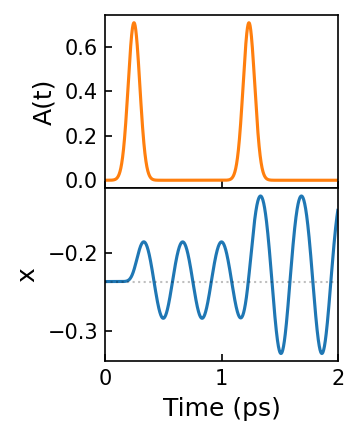

In [3]:
time = np.loadtxt("Data/time_4a.dat")
trace = np.loadtxt("Data/trace_4a.dat")
pulse = np.loadtxt("Data/pulse_4a.dat")

fig4a, (ax0,ax1) = plt.subplots(2, 1, figsize=(2, 3), dpi=150, facecolor='white', sharex=True)

ax0.plot(time, pulse, 'C1-')
ax0.set_xlim(0, 2)
ax0.set_ylabel("A(t)", fontsize=12)

ax1.plot(time, trace, color='C0')
ax1.set_xlim(0, 2)
ax1.set_ylabel("x", fontsize=12)
ax1.set_xlabel("Time (ps)", fontsize=12)
ax1.axhline(y=trace[0], color='k', linestyle=':', alpha=0.25, linewidth=1)

ax0.tick_params(direction='in', labelbottom=False)
ax1.tick_params(direction='in')

plt.subplots_adjust(hspace=0)
#plt.savefig('Fig4a.pdf', bbox_inches='tight')

Fig 4b

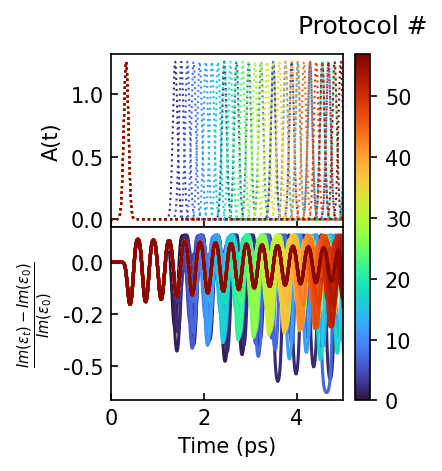

In [6]:
# Fig 4b
from matplotlib.colors import Normalize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cm as cm
import matplotlib as mpl

freq_in_thz = 6.3507799295888985 # converts w=sqrt(k/m) in sqrt(THz/(Angstrom^2 * atomic mass unit)) to THz
t_in_ps = 1 / freq_in_thz
tfine=np.linspace(0,20/t_in_ps,20000)

pulses = np.loadtxt('Data/pulses_4b.dat')
imag_eps = np.loadtxt('Data/imag_eps_4b.dat')

fig4b, (ax2,ax3) = plt.subplots(2,1,figsize=(2, 3), dpi=150, facecolor='white', sharex=True)
cmap = plt.colormaps.get_cmap('turbo')
norm = mpl.colors.Normalize(vmin=0, vmax=imag_eps.shape[0])
colors = [cmap(norm(i)) for i in range(imag_eps.shape[0])]

for i in range(imag_eps.shape[0]):
     if i%2==0 and i!=0:
         ax2.plot(tfine*t_in_ps, pulses[i], color=colors[i], linewidth=1,linestyle=':')
     ax3.plot(tfine*t_in_ps, imag_eps[i], color=colors[i])

ax2.set_ylabel('A(t)')
ax2.set_xlim(0,5)
ax3.set_xlim(0,5)
ax3.set_ylabel(r'$\frac{Im(ε_{t})-Im(ε_{0})}{Im(ε_{0})}$')
ax3.set_xlabel('Time (ps)')
ax2.tick_params(direction='in')
ax3.tick_params(direction='in')
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

cax = fig4b.add_axes([0.94, 0.11, 0.05, 0.77])  # [left, bottom, width, height] in fraction of figure dimensions
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax,orientation='vertical', fraction=0.02, pad=0.02)
cbar.ax.set_title('Protocol #', pad=10)
plt.subplots_adjust(hspace=0)
#plt.savefig('Fig4b.pdf', bbox_inches='tight')

Fig 4c

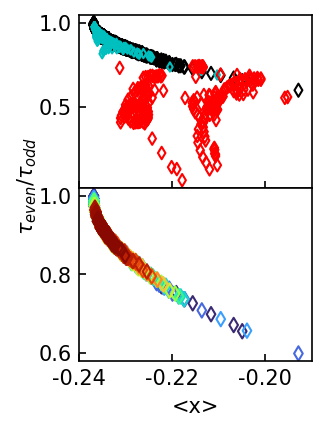

In [7]:
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the list of lists from the file
with open('Data/avg_pos_4c.pkl', 'rb') as f:
    avg_pos0 = pickle.load(f)
with open('Data/ratio_4c.pkl', 'rb') as f:
    ratio0 = pickle.load(f)

with open('Data/avg_pos1_4c.pkl', 'rb') as f:
    avg_pos1 = pickle.load(f)
with open('Data/ratio1_4c.pkl', 'rb') as f:
    ratio1 = pickle.load(f)

with open('Data/avg_pos2_4c.pkl', 'rb') as f:
    avg_pos2 = pickle.load(f)
with open('Data/ratio2_4c.pkl', 'rb') as f:
    ratio2 = pickle.load(f)

fig4c, (ax4,ax5) = plt.subplots(2,1,figsize=(2, 3), dpi=150, facecolor='white', sharex=True)

for i, (x, y) in enumerate(zip(avg_pos0, ratio0)):
    ax4.scatter(x, y, color='k', marker='d', s=20, facecolors='none')
    sc=ax5.scatter(x, y, color=colors[i], marker='d', s=24, facecolors='none')

for i, (x, y) in enumerate(zip(avg_pos1, ratio1)):
    ax4.scatter(x, y, color='c', marker='d', s=10, facecolors='none')

for i, (x, y) in enumerate(zip(avg_pos2, ratio2)):
    ax4.scatter(x, y, color='r', marker='d', s=18, facecolors='none')

ax4.tick_params(direction='in')
ax5.set_xlabel('<x>')
ax5.set_xlim(-0.24,-0.19)
ax5.tick_params(direction='in')
ax5.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig4c.text(-0.05, 0.50, r'$\tau_{even}/\tau_{odd}$', ha='center', va='center', rotation='vertical')

plt.subplots_adjust(hspace=0)

#plt.savefig('Fig4c.pdf', bbox_inches='tight')